## Q1) Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model: 

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

What the equation means is that the families with kids spend $223 lesser than those with kids. An increase in $1000 in expense results in an increase $1.2 and an additional 0.2 x annual income.

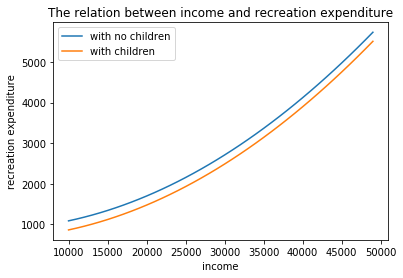

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(10000, 50000, 1000)
# Y represents annual expenditure on recreation
# for families with no children
Y = 873 + 0.0012*X + 0.000002*(X**2)
# Y_kids represents annual expenditure on recreation
# for families with children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="with no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()


### 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']

# X is the feature set
X = weather_df[['humidity', 'windspeed']]

# We add constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:24:14   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.0

All of the estimated coefficients are statistically significant as their p-values are way less than 0.05.
We can expect that as humidity increases the difference between the apparent temperature and the temperature also increases. However, according to our estimations the sign of the coefficient of the humidity is negative. We may also expect that the difference of the apparent tempereture and the temperature negatively related with the wind speed as our estimation says so.
According to the estimated model, 1 point increase in the humidity results in 3.03 points decrease in the target. 1 point increase in the windspeed is associated with 0.12 point decrease in our target.

In [0]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
# Adding interaction between humidity and speed
weather_df['humidity_windspeed_interaction'] = weather_df.humidity * weather_df.windspeed

X = weather_df[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:51:46   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar to the previous model, all of the coefficients are statistically significant as their p-values are less than 0.05.
Signs of the both humidity and windspeed changed from negative to the positive when we include the intereaction term.
According to the model, 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases in the target respectively.
According to the model, the coefficient of the interaction term is -0.30. We can interpret it as follows. Given a windspeed level, 1 point increase in humidity results in 0.18 - 0.30 X windspeed point increase in the target. This means that the increase in the target is lower for high values of windspeed than for low values of windspeed. So, the windspeed mitigates the effect of humidity increase on the target. Similarly for a given humidity level, 1 point increase in the windspeed results in 0.09 - 0.30 X humidity point increase in the target. So, the humidity also mitigates the effect of windspeed on the target.

###  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
## As mentioned in the previous assignments, lets take the top 5 numerical and top 2 non numerical variables that has high correlation.

house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [0]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:14:52   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


The statistically significant variables are overallqual, grlivarea, garagecars, totalbsmtsf, mszoning_FV and mszoning_RL. All the other variables are statistically insignificant and hence their coefficients are statistically zero. According to the estimation results:
1 point increase in overallqual results in \$23330 increase in sale price.
1 point increase in grlivarea results in \$45.6344 increase in sale price.
1 point increase in garagecars results in \$13450 increase in sale price.
1 point increase in totalbsmtsf results in \$28.3816 increase in sale price.
Average sale price is higher in mszoning_FV and mszoning_RL than the base zone by \$25090 and \$28570 respectively. So, the average house price is the highest in mszoning_RL.


The results resemble the previous model's results. The estimated coefficients are close to the previous model except the dummy variables. The coefficients of the dummies changed relatively larger than the other variables.
Considering the results, the most prominent factors affecting the sale price seem to be the overallqual and the mszoning.